In [1]:
# Import Relevant Objects
import numpy as np
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import plotly.graph_objects as go 
import scipy
import HeatFlowTomakGenerator_3

In [2]:
num_i_grid_points = 50
num_j_grid_points = 50
Final_Time = 20.0
Num_Timesteps = 100.0
num_grid_points = num_i_grid_points * num_j_grid_points

In [3]:
Q_11 = 100 * np.ones(shape = (num_grid_points,))
Q_22 = 100 * np.ones(shape = (num_grid_points,))
Q_12 = 10 * np.ones(shape = (num_grid_points,))
Resvoir = 1 * np.ones(shape  = (num_grid_points,))
Source  = 1e6 * np.ones(shape = (num_grid_points,))
Temperatures = HeatFlowTomakGenerator_3.Solve_PDE(Q_11, Q_22, Q_12, Source, Resvoir, num_i_grid_points, num_j_grid_points, Final_Time, Num_Timesteps)
Temperatures

Time_Iteration 0
(9999, 2500)


LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
Temperatures.shape

(100, 1, 2500)

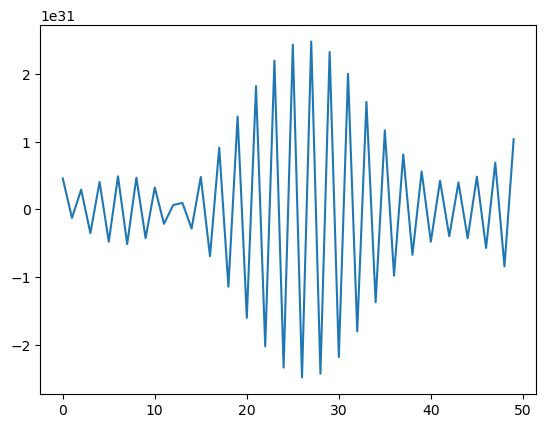

In [ ]:
plt.plot(Temperatures.reshape(-1,50,50)[-1, 4, :])

In [ ]:
np.min(Temperatures[-8])

-3.295833135084821e+29

In [6]:
numbers = np.arange(start = 0, stop = 10, step = 1)
numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
def periodic_boundary(index, num_grid_points):
        if index < num_grid_points//2:
            return 2*index
        else:
            return 2*(num_grid_points-index)-1
def index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points):
        return periodic_boundary(index_i, num_i_grid_points) * num_j_grid_points + periodic_boundary(index_j, num_j_grid_points)

Periodic_L_indices = {}
for i in range(10):
      for j in range(10): 
        Periodic_L_indices[index_periodic_boundary_forward_converter(i,j, 10, 10)] = (i,j) 

In [47]:
Periodic_L_indices

{0: (0, 0),
 2: (0, 1),
 4: (0, 2),
 6: (0, 3),
 8: (0, 4),
 9: (0, 5),
 7: (0, 6),
 5: (0, 7),
 3: (0, 8),
 1: (0, 9),
 20: (1, 0),
 22: (1, 1),
 24: (1, 2),
 26: (1, 3),
 28: (1, 4),
 29: (1, 5),
 27: (1, 6),
 25: (1, 7),
 23: (1, 8),
 21: (1, 9),
 40: (2, 0),
 42: (2, 1),
 44: (2, 2),
 46: (2, 3),
 48: (2, 4),
 49: (2, 5),
 47: (2, 6),
 45: (2, 7),
 43: (2, 8),
 41: (2, 9),
 60: (3, 0),
 62: (3, 1),
 64: (3, 2),
 66: (3, 3),
 68: (3, 4),
 69: (3, 5),
 67: (3, 6),
 65: (3, 7),
 63: (3, 8),
 61: (3, 9),
 80: (4, 0),
 82: (4, 1),
 84: (4, 2),
 86: (4, 3),
 88: (4, 4),
 89: (4, 5),
 87: (4, 6),
 85: (4, 7),
 83: (4, 8),
 81: (4, 9),
 90: (5, 0),
 92: (5, 1),
 94: (5, 2),
 96: (5, 3),
 98: (5, 4),
 99: (5, 5),
 97: (5, 6),
 95: (5, 7),
 93: (5, 8),
 91: (5, 9),
 70: (6, 0),
 72: (6, 1),
 74: (6, 2),
 76: (6, 3),
 78: (6, 4),
 79: (6, 5),
 77: (6, 6),
 75: (6, 7),
 73: (6, 8),
 71: (6, 9),
 50: (7, 0),
 52: (7, 1),
 54: (7, 2),
 56: (7, 3),
 58: (7, 4),
 59: (7, 5),
 57: (7, 6),
 55: (7, 

In [56]:
def index_periodic_boundary_backward_converter(Periodic_L_index, Periodic_L_indices,num_j_grid_points):
        index_i, index_j = Periodic_L_indices[Periodic_L_index]
        L_index = index_i * num_j_grid_points + index_j
        return L_index

In [63]:
lister = []
for index_i in range(10):
    for index_j in range(10):
        Periodic_L_index = index_i * num_j_grid_points + index_j
        L_index = index_periodic_boundary_backward_converter(Periodic_L_index, Periodic_L_indices, num_j_grid_points)
        print(Periodic_L_index, L_index)
        lister.append([Periodic_L_index, L_index])

0 0
1 9
2 1
3 8
4 2
5 7
6 3
7 6
8 4
9 5
10 90
11 99
12 91
13 98
14 92
15 97
16 93
17 96
18 94
19 95
20 10
21 19
22 11
23 18
24 12
25 17
26 13
27 16
28 14
29 15
30 80
31 89
32 81
33 88
34 82
35 87
36 83
37 86
38 84
39 85
40 20
41 29
42 21
43 28
44 22
45 27
46 23
47 26
48 24
49 25
50 70
51 79
52 71
53 78
54 72
55 77
56 73
57 76
58 74
59 75
60 30
61 39
62 31
63 38
64 32
65 37
66 33
67 36
68 34
69 35
70 60
71 69
72 61
73 68
74 62
75 67
76 63
77 66
78 64
79 65
80 40
81 49
82 41
83 48
84 42
85 47
86 43
87 46
88 44
89 45
90 50
91 59
92 51
93 58
94 52
95 57
96 53
97 56
98 54
99 55


In [64]:
lister

[[0, 0],
 [1, 9],
 [2, 1],
 [3, 8],
 [4, 2],
 [5, 7],
 [6, 3],
 [7, 6],
 [8, 4],
 [9, 5],
 [10, 90],
 [11, 99],
 [12, 91],
 [13, 98],
 [14, 92],
 [15, 97],
 [16, 93],
 [17, 96],
 [18, 94],
 [19, 95],
 [20, 10],
 [21, 19],
 [22, 11],
 [23, 18],
 [24, 12],
 [25, 17],
 [26, 13],
 [27, 16],
 [28, 14],
 [29, 15],
 [30, 80],
 [31, 89],
 [32, 81],
 [33, 88],
 [34, 82],
 [35, 87],
 [36, 83],
 [37, 86],
 [38, 84],
 [39, 85],
 [40, 20],
 [41, 29],
 [42, 21],
 [43, 28],
 [44, 22],
 [45, 27],
 [46, 23],
 [47, 26],
 [48, 24],
 [49, 25],
 [50, 70],
 [51, 79],
 [52, 71],
 [53, 78],
 [54, 72],
 [55, 77],
 [56, 73],
 [57, 76],
 [58, 74],
 [59, 75],
 [60, 30],
 [61, 39],
 [62, 31],
 [63, 38],
 [64, 32],
 [65, 37],
 [66, 33],
 [67, 36],
 [68, 34],
 [69, 35],
 [70, 60],
 [71, 69],
 [72, 61],
 [73, 68],
 [74, 62],
 [75, 67],
 [76, 63],
 [77, 66],
 [78, 64],
 [79, 65],
 [80, 40],
 [81, 49],
 [82, 41],
 [83, 48],
 [84, 42],
 [85, 47],
 [86, 43],
 [87, 46],
 [88, 44],
 [89, 45],
 [90, 50],
 [91, 59],
 [92, 51

In [66]:
for Periodic_L_index, indices in Periodic_L_indices.items():
    index_i, index_j = indices
    Actual_L_index = index_i * num_j_grid_points + index_j
    print(Periodic_L_index, Actual_L_index)

0 0
2 1
4 2
6 3
8 4
9 5
7 6
5 7
3 8
1 9
20 10
22 11
24 12
26 13
28 14
29 15
27 16
25 17
23 18
21 19
40 20
42 21
44 22
46 23
48 24
49 25
47 26
45 27
43 28
41 29
60 30
62 31
64 32
66 33
68 34
69 35
67 36
65 37
63 38
61 39
80 40
82 41
84 42
86 43
88 44
89 45
87 46
85 47
83 48
81 49
90 50
92 51
94 52
96 53
98 54
99 55
97 56
95 57
93 58
91 59
70 60
72 61
74 62
76 63
78 64
79 65
77 66
75 67
73 68
71 69
50 70
52 71
54 72
56 73
58 74
59 75
57 76
55 77
53 78
51 79
30 80
32 81
34 82
36 83
38 84
39 85
37 86
35 87
33 88
31 89
10 90
12 91
14 92
16 93
18 94
19 95
17 96
15 97
13 98
11 99
